<a href="https://colab.research.google.com/github/humanet1603/krx_using_api/blob/main/MA_Slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 이동평균 교차점과 기울기의 관계 연구
-임의의 데이터 생성

ERROR: Could not find a version that satisfies the requirement ace_tools (from versions: none)
ERROR: No matching distribution found for ace_tools


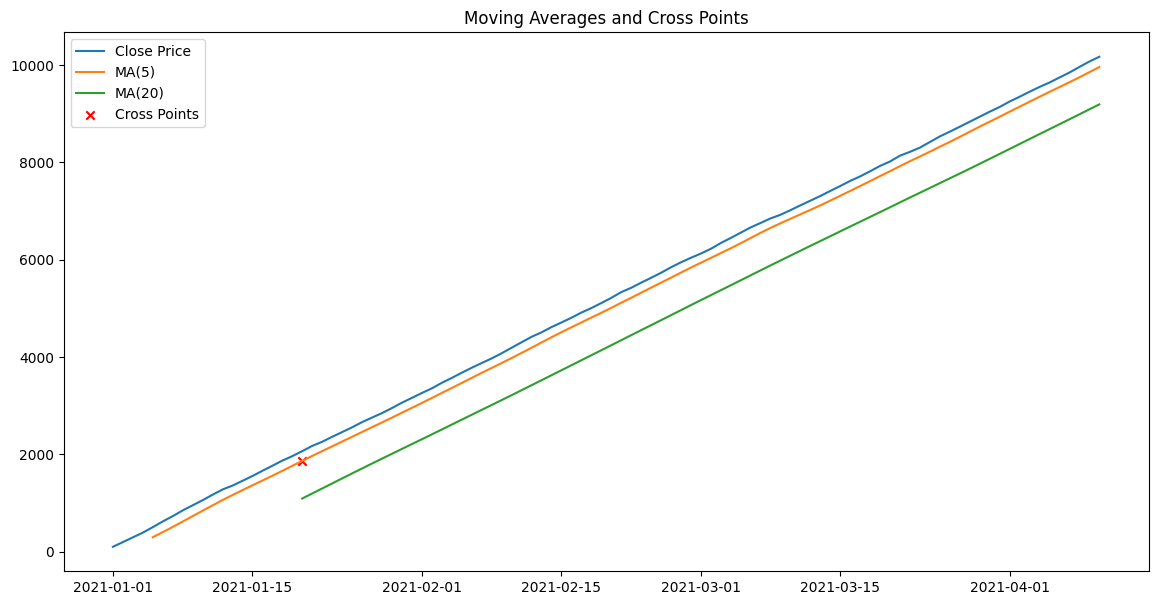

,MA5,MA20,Slope_MA5,Slope_MA20
Date,,,,
2021-01-01,NaN,NaN,NaN,NaN
2021-01-20,1866.775846,1093.516218,102.257607,NaN


In [5]:
!pip install pandas numpy matplotlib ace_tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample Data: Replace with your own dataset
data = {
    'Date': pd.date_range(start='2021-01-01', periods=100, freq='D'),
    'Close': np.random.normal(loc=100, scale=10, size=100).cumsum()
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate Moving Averages
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

# Identify Cross Points
df['MA5_above_MA20'] = df['MA5'] > df['MA20']
df['Cross'] = df['MA5_above_MA20'].ne(df['MA5_above_MA20'].shift())

# Calculate Slopes
df['Slope_MA5'] = df['MA5'].diff()
df['Slope_MA20'] = df['MA20'].diff()

# Extract Cross Points
cross_points = df[df['Cross']]

# Plot for Visualization
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA5'], label='MA(5)')
plt.plot(df.index, df['MA20'], label='MA(20)')
plt.scatter(cross_points.index, cross_points['MA5'], color='red', marker='x', label='Cross Points')
plt.legend()
plt.title('Moving Averages and Cross Points')
plt.show()

# Display relevant data
cross_points_analysis = cross_points[['MA5', 'MA20', 'Slope_MA5', 'Slope_MA20']]
cross_points_analysis.head()




